# Analysis of all the customer reviews over time & over social media

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from textblob import TextBlob
import glob
import json
import time
import calendar

In [2]:
reviews = pd.read_csv(r'data\boston-airbnb-open-data\reviews.csv')

print(reviews.head())

   listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...  


In [12]:
#print(type(reviews.date[0]))
#df = reviews.head()
#df['year'] = df.date.apply(lambda x: x.split('-')[0])
#type(df.year[0])

In [3]:
review_count_dates = pd.to_datetime(reviews['date']).value_counts().resample('D').mean().fillna(0)


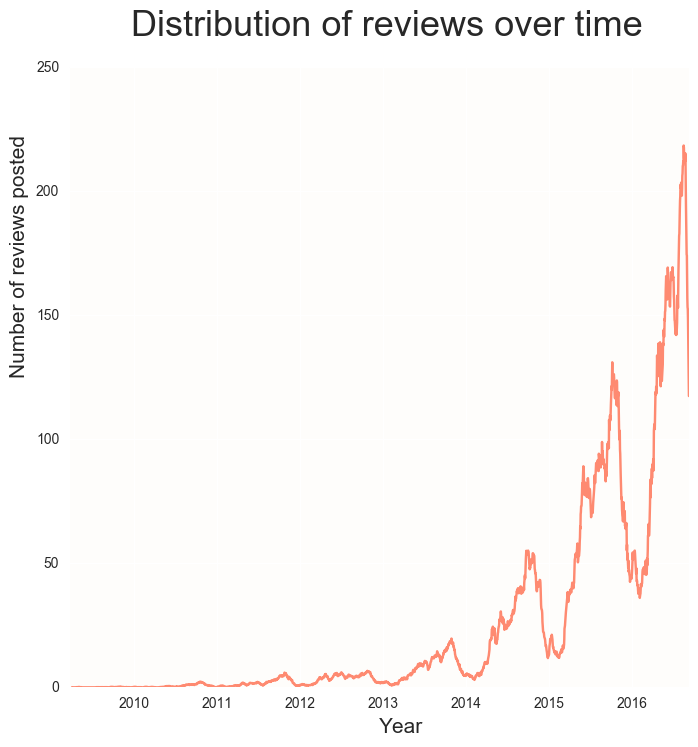

In [4]:
fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111)
ax.grid(False)
ax.set_axis_bgcolor('#FEFDFB')
title='Distribution of reviews over time'
transparency = 0.5
review_count_dates.rolling(window=15).mean().plot(ax=ax, color='#FE8A71', title = title)

ax.set_title(ax.get_title(), fontsize=26, ha='left')
ax.title.set_position((0.1,1.04))

xlab = 'Year'
ax.set_xlabel(xlab, fontsize=15, ha='left')

ylab = 'Number of reviews posted'
ax.set_ylabel(ylab, fontsize=15, ha='left')

# Analyzing sentiments for Airbnb on Twitter over time

In [5]:
twitter_sentiment = pd.DataFrame()
twitter_sentiment['year'] = reviews['date']

twitter_sentiment['year'] = twitter_sentiment.year.apply(lambda x: x.split('-')[0])

yearSeq = twitter_sentiment.year.unique()
years = [int(i) for i in yearSeq]
years.sort()
print(years)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [6]:
def convert_to_epoc():
    t = calendar.timegm(time.strptime('Jan 01, 2008 @ 00:00:00 UTC',"%b %d, %Y @ %H:%M:%S %Z"))
    return t;

In [17]:
count = 0
positive = 0
negative = 0
neutral = 0

for filename in glob.glob(r"data\twitter\*.json"):
    with open(filename, 'r') as f:
        twitter_file_data = json.load(f)
        
        for items in twitter_file_data["statuses"]:
    
            blob = TextBlob(items["text"])
            #print(items["text"])
    
            count += 1
            total = 0
    
            for sentence in blob.sentences:
                blob.tags
                blob.noun_phrases
                value = sentence.sentiment.polarity
                #print(value)
                total += value
    
            if(total > 0):
                positive = positive + 1 
            elif total < 0:
                negative +=1
            else:
                neutral +=1
                
print(positive)
print(negative)
print(neutral)

85
60
355


In [18]:
count

500

In [55]:
label_li = ['positive','negative','neutral']
value_li = [positive, negative, neutral]

customer_sentiments = pd.DataFrame(value_li, index=label_li, columns=['twitter_count'])

customer_sentiments['twitter_count']

positive     85
negative     60
neutral     355
Name: twitter_count, dtype: int64

In [10]:
airbnb_pos = 0
airbnb_neg = 0
airbnb_neu = 0

reviewDF = pd.DataFrame()
reviewDF['reviews'] = reviews.comments

#print(type(reviewDF.reviews[0]))
reviewDF['reviews'] = reviewDF.reviews.fillna('')
for customer_review in reviewDF.reviews:
    
    blob = TextBlob(customer_review)
    polarity = 0
    
    for sentence in blob.sentences:
        blob.tags
        blob.noun_phrases
        value = sentence.sentiment.polarity
        #print(value)
        polarity += value
    
        if(polarity > 0):
            airbnb_pos += 1 
        elif polarity < 0:
            airbnb_neg +=1
        else:
            airbnb_neu +=1
                
print(airbnb_pos)
print(airbnb_neg)
print(airbnb_neu)


308206
8350
19741


In [56]:
airbnb_sentiments_li = [airbnb_pos,airbnb_neg,airbnb_neu]

customer_sentiments['airbnb_count'] = airbnb_sentiments_li
customer_sentiments

,twitter_count,airbnb_count
positive,85,40184
negative,60,8350
neutral,355,19741


In [23]:
airbnb_row = reviews.shape[0]
airbnb_row

68275

In [57]:
#converting values to percentage

customer_sentiments.twitter_count = customer_sentiments.twitter_count.apply(lambda x: x*100/count)
customer_sentiments.airbnb_count = customer_sentiments.airbnb_count.apply(lambda x: x*100/airbnb_row)


In [118]:
customer_sentiments['polarity'] = customer_sentiments.index
customer_sentiments.reset_index


<bound method DataFrame.reset_index of           twitter_count  airbnb_count  polarity
positive           17.0     58.856097  positive
negative           12.0     12.229952  negative
neutral            71.0     28.913951   neutral>

,positive,negative,neutral
twitter_count,17,12,71
airbnb_count,58.8561,12.23,28.914
polarity,positive,negative,neutral


In [136]:
li_twi = customer_sentiments.twitter_count
li_abnb = customer_sentiments.airbnb_count


toplot = pd.DataFrame()
toplot['Twitter'] = li_twi
toplot['Airbnb'] = li_abnb
newplot = toplot.T
newplot

,positive,negative,neutral
Twitter,17.000000,12.000000,71.000000
Airbnb,58.856097,12.229952,28.913951


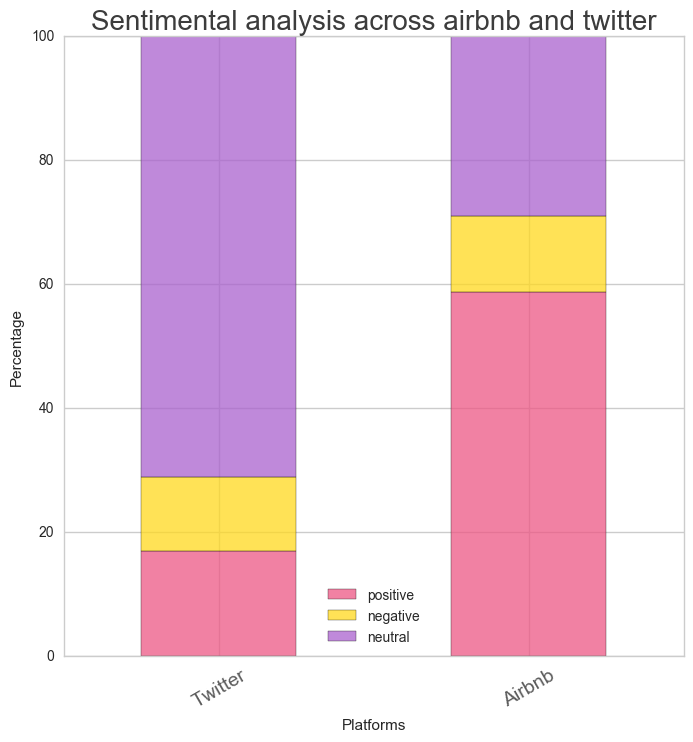

In [140]:
barfig = plt.figure(1, figsize=(8,8))
ax = barfig.add_subplot(111)
ax.grid(False)

colors = ['#ED5784','#FFD91E','#AA61CE']

my_plot = newplot.plot(kind='bar',
                       stacked=True,
                       title="Sentimental analysis across airbnb and twitter",
                       ax=ax,
                       color=colors,
                       alpha=0.75)

ax.set_xticklabels(newplot.index,
                   rotation=30, 
                   fontsize=14, 
                   alpha=0.75)

ax.set_title('Sentimental analysis across airbnb and twitter', 
             fontsize=20, 
             alpha=0.90)

my_plot.set_xlabel("Platforms")
my_plot.set_ylabel("Percentage")